In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
sales_train = pd.read_csv('./data/sales_train.csv')
shops = pd.read_csv('./data/shops.csv')
items = pd.read_csv('./data/items.csv')
item_categories = pd.read_csv('./data/item_categories.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
print(sales_train.shape)
print(shops.shape)
print(items.shape)
print(item_categories.shape)
print(test.shape)

(2935849, 6)
(60, 2)
(22170, 3)
(84, 2)
(214200, 3)


In [4]:
sales_train.head()  # 월별 판매량만 구하려면 data 피처를 제거
                    # Target 값 = data_block_num 피처의 값이 같은 데이터들의 item_cnt_data값의 합임.
                    # 훈련 데이터 중 가장 최근인 2015년 10월 판매 내역을 검증 데이터로 사용

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
sales_train.info()  # 메모리 절감 전략이 필요함.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [6]:
shops.head()  # 상점 데이터 shop_name 의 첫 단어는 도시 이름임.
              # train_sale의 shop_id를 기준으로 sales_train과 shops 데이터 병합 필요

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [7]:
shops.info()   # 상점 데이터 60개로 결측 데이터가 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [8]:
items.head()  # item 데이터에서 item_category_id 제거
              # item_id를 기준으로 sales_train과 items 병합

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [9]:
items.info()  # item 데이터는 결측 데이터가 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [10]:
item_categories.head()   # item_category_id를 기준으로 sales_train과 item_categories 데이터 병합 필요
                         # item_category_name의 첫 단어는 대분류로 분류하여야 함

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [11]:
item_categories.info()  # 모든 데이터의 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [12]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


# 01. 데이터 병합

1. 피처 요약표를 만들고 시각화를 하기 위하여 데이터 병합
  - 분석결과 같이 피처를 기준으로 병합
  - pandas의 merge() 함수를 이용하여 구현
2. sales_train, shops, items, item_categories를 모두 병합하여 그 결과를 train에 할당한다.

In [13]:
train = sales_train.merge(shops, on='shop_id', how='left')
train = train.merge(items, on='item_id', how='left')
train = train.merge(item_categories, on='item_category_id', how='left')

In [14]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства
...,...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,"Москва ТРК ""Атриум""",V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства
2935845,09.10.2015,33,25,7460,299.00,1.0,"Москва ТРК ""Атриум""",V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства
2935846,14.10.2015,33,25,7459,349.00,1.0,"Москва ТРК ""Атриум""",V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства
2935847,22.10.2015,33,25,7440,299.00,1.0,"Москва ТРК ""Атриум""",V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3


# 02. 피처 요약표 작성

In [15]:
def resumetable(df):
    print(f'데이터셋 구조: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫번째 값'] = df.loc[0].values
    summary['두번째 값'] = df.loc[1].values
    return summary

In [16]:
resumetable(train)  # 상점 id, 상품 id, 상품분류 id는 상점명, 상품명, 상품분류명과 1:1 매칭되므로
                    # 둘 중에 하나를 제거해야 함. >> 원인 : 메모리 절약을 위해서

데이터셋 구조: (2935849, 10)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫번째 값,두번째 값
0,date,object,0,1034,02.01.2013,03.01.2013
1,date_block_num,int64,0,34,0,0
2,shop_id,int64,0,60,59,25
3,item_id,int64,0,21807,22154,2552
4,item_price,float64,0,19993,999.0,899.0
5,item_cnt_day,float64,0,198,1.0,1.0
6,shop_name,object,0,60,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум"""
7,item_name,object,0,21807,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP
8,item_category_id,int64,0,84,37,58
9,item_category_name,object,0,84,Кино - Blu-Ray,Музыка - Винил


# 03. 데이터 시각화

1. 병합한 train을 이용해서 시각화
2. 피처 개수가 많지 않고, 그 중 일부는 식별자이거나 문자 데이터라서 시각화 할 수 있는 데이터가 적다.
3. 일별 판매량
  - train에서 식별자나 문자 데이터를 빼면 item_cnt_day와 item_price 피처만 남음
  - 우선 item_cnt_day 피처 시각화

In [17]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='item_cnt_day'>

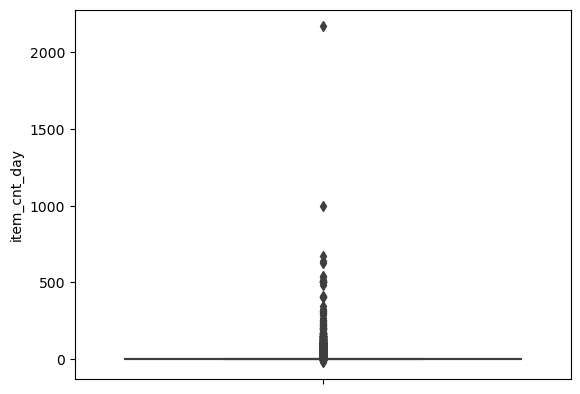

In [18]:
sns.boxplot(y='item_cnt_day', data=train)

boxplot 시각화 결과를 분석하면
 - 이상치가 많아서 박스플롯 모양이 이상함.
 - 심한 이상치는 제거를 해야 함
 - 여기서는 item_cnt_day 1,000 이상인 데이터 제거

# 04. 판매량(상품 가격) 시각화

<AxesSubplot:ylabel='item_price'>

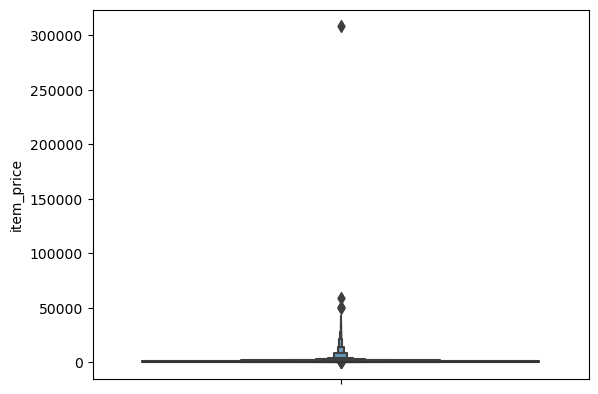

In [19]:
sns.boxenplot(y='item_price', data=train)

boxplot 시각화 분석 결과
  - 300,000루불(러시아 화폐단위, 한국 돈 450만 원)이 넘는 판매가 때문에 boxplot 모양이 이상함.
  - 추후 판매가 50,000루불 이상인 이상치는 제거 

# 05. 그룹화

- 특정 피처를 기준으로 그룹화해서 시각화
- train 데이터의 date_block_num 피처를 기준으로 그룹화하는 대상은 item_cnt_day 피처 값의 합(sum)을 구해야 함.
  (월(data_block_num) 월간 판매량(item_cnt_day의 합)을 구한다는 것임.)

In [20]:
group = train.groupby('date_block_num').agg({'item_cnt_day': 'sum'})
group

,item_cnt_day
date_block_num,
0,131479.0
1,128090.0
2,147142.0
3,107190.0
4,106970.0
5,125381.0
6,116966.0
7,125291.0
8,133332.0


In [21]:
group = train.groupby('date_block_num').agg({'item_cnt_day': 'sum'})
group.reset_index()  # index 재설정

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0
5,5,125381.0
6,6,116966.0
7,7,125291.0
8,8,133332.0
9,9,127541.0


- reset_index를 하는 사유는 그룹화한 date_block_num 피처가 index 설정되어 있기 때문임
- 그래프를 그릴 때 date_block_num 피처를 사용해야 하기 때문에 index를 재설정한 것임

# 06. ★월별 판매량 ★

[Text(0.5, 1.0, 'Distribution of monthly item counts by date block number'),
 Text(0.5, 0, 'date_block_num'),
 Text(0, 0.5, 'item_cnt_day')]

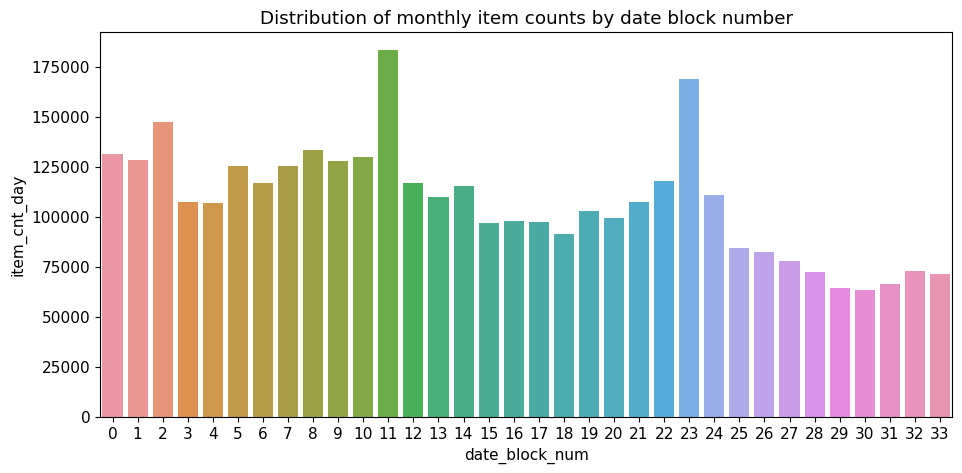

In [22]:
mpl.rc('font', size=11)
figure, ax = plt.subplots()
figure.set_size_inches(11, 5)

# 월별 총 상품 판매량
group_month_sum = train.groupby('date_block_num').agg({'item_cnt_day': 'sum'})
group_month_sum = group_month_sum.reset_index()

# 월별 총 상품 판매량 막대 그래프
sns.barplot(x='date_block_num', y='item_cnt_day', data=group_month_sum)

# 그래프 제목, X축 라벨, Y축 라벨명 설정
ax.set(title='Distribution of monthly item counts by date block number',
       xlabel='date_block_num',
       ylabel='item_cnt_day')

# 07. 상품 분류별 총 상품 판매량

[Text(0.5, 1.0, 'Distribution of total item counts by itemcategory id'),
 Text(0.5, 0, 'item_category_id'),
 Text(0, 0.5, 'item_cnt_day')]

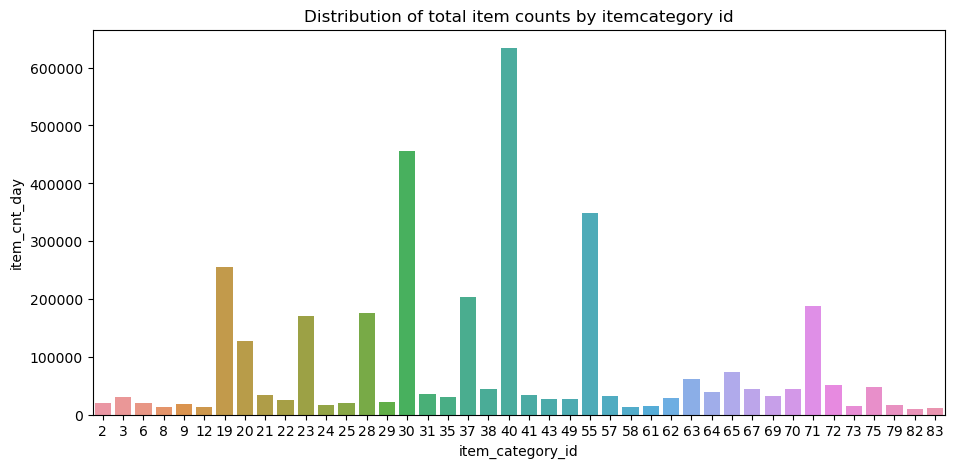

In [23]:
mpl.rc('font', size=10)
figure, ax = plt.subplots()
figure.set_size_inches(11, 5)

# 상품 분류별 총 상품 판매량
group_cat_sum = train.groupby('item_category_id').agg({'item_cnt_day': 'sum'})
group_cat_sum = group_cat_sum.reset_index()

# 판매량이 10,000개를 초과하는 상품 분류만 추출
group_cat_sum = group_cat_sum[group_cat_sum['item_cnt_day'] > 10000]

# 상품 분류별 총 상품 판매량 막대 그래프
sns.barplot(x='item_category_id', y='item_cnt_day', data=group_cat_sum)

# 그래프 제목, X축 라벨, Y축 라벨명 설정
ax.set(title='Distribution of total item counts by itemcategory id',
       xlabel='item_category_id',
       ylabel='item_cnt_day')

# 08. 상점별 총 상품 판매량!

[Text(0.5, 1.0, 'Distribution of total item counts by shop id'),
 Text(0.5, 0, 'shop_id'),
 Text(0, 0.5, 'item_cnt_day')]

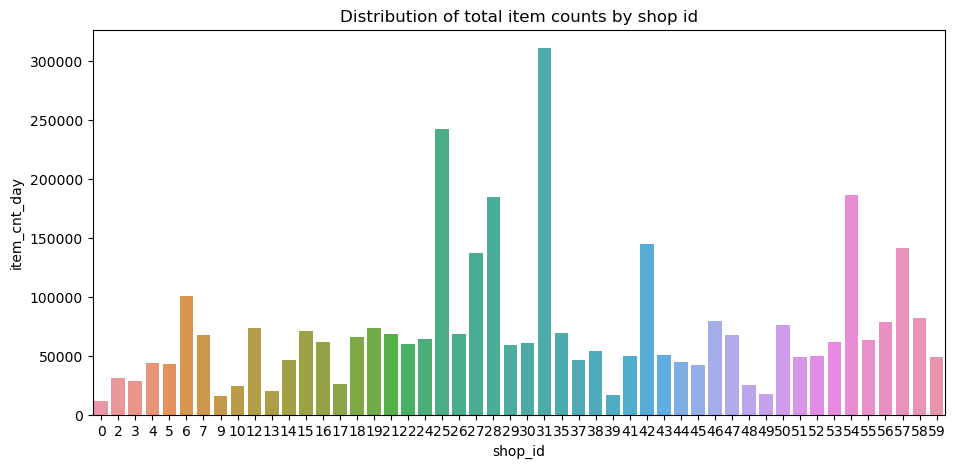

In [24]:
mpl.rc('font', size=10)
figure, ax = plt.subplots()
figure.set_size_inches(11, 5)

# 상점별 총 상품 판매량
group_shop_sum = train.groupby('shop_id').agg({'item_cnt_day': 'sum'})
group_shop_sum = group_shop_sum.reset_index()

# 판매량이 10,000개를 초과하는 상점만 추출
group_shop_sum = group_shop_sum[group_shop_sum['item_cnt_day'] > 10000]

# 상점별 총 상품 판매량 막대 그래프
sns.barplot(x='shop_id', y='item_cnt_day', data=group_shop_sum)

# 그래프 제목, X축 라벨, Y축 라벨명 설정
ax.set(title='Distribution of total item counts by shop id',
       xlabel='shop_id',
       ylabel='item_cnt_day')

# 09. 분석 결과

* 판매량 관련 피처 값은 모두 0 ~ 20 사이로 제한해야 함
* 시계열 데이터이므로 데이터 순서를 꼭 지켜야 함(검증 데이터는 최근 1개월치 이용)
* 타깃값 : 같은 달 일별 판매량을 합쳐 타깃값(월별 판매량)을 구해야 함
* 데이터 병합 : 추가 정보 파일(상점, 상품, 상품분류)은 각각의 ID(상점ID, 상품ID, 상품분류ID)를 기준으로 훈련 데이터에 병합할 수 있음
* 다양한 피처 엔지니어링 후 데이터 크기가 커서 메모리 관리 필요
* 파생 피처 추가 : 상점명과 상품분류명의 첫 단어는 각각 도시와 대분류
* 피처 제거 : 월별 판매량만 구하면 되니 date 피처 필요 없음
* 피처 제거 : 상점ID, 상품ID, 상품분류ID는 각각 상점명, 상품명, 상품분류명과 1:1로 매칭되므로 둘 중 하나만 있으면 됨
* 이상치 제거 : 일별 판매량과 판매가에는 값이 이상치가 있어서 제거 필요
* 모든 데이터에서 결측값이 없음